Adapted from the [fast.ai course](http://course.fast.ai/) by Jeremey Howard

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import animation, rc
rc('animation', html='html5')
from IPython.display import HTML

In [2]:
from numpy.random import random as random_u
from numpy.random import normal as random_n

In [3]:
def linear(a, b, x):
    return a * x + b

In [4]:
a = 3
b = 8

In [25]:
n = 300
x = random_u(n)
err = random_n(size=n)
y = linear(a, b, x) + err

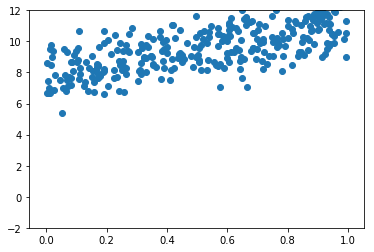

In [26]:
# setup the plot
fig, ax = plt.subplots()
ax.set_ylim((-2, 12))
ax.scatter(x, y)
line, = ax.plot([], [])

In [16]:
def sse(y, y_pred):
    # sum of the square errors
    return ((y - y_pred) ** 2).sum()

def loss(y, a, b, x):
    return sse(y, linear(a, b, x))

The error e is given by
$$ e = ((ax + b) - y) ^ 2 $$

The gradients along b and a are given by

$$ \frac{\partial e}{\partial b} = 2((ax + b) - y) = 2(\hat y - y) $$

where $ \hat y = ax + b$ and

$$ \frac{\partial e}{\partial a} = 2((ax + b) - y)x = x \frac{\partial e}{\partial b} $$



In [17]:
lr = 0.02  # learning rate

In [18]:
a_guess = -1; b_guess = 1

In [19]:
def update():
    global a_guess, b_guess
    y_pred = linear(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x * dydb
    a_guess -= lr * dyda.mean()
    b_guess -= lr * dydb.mean()

In [20]:
def animate(i):
    global a_guess, b_guess
    update()
    line.set_data(x, linear(a_guess, b_guess, x))
    return ax,

In [21]:
anim = animation.FuncAnimation(fig, animate, frames=100)
HTML(anim.to_html5_video())

In [22]:
print('actual (a, b) = ({} {})'.format(a, b))
print('guess  (a, b) = ({} {})'.format(a_guess, b_guess))

actual (a, b) = (3 8)
guess  (a, b) = (2.8375793976182715 8.013601648589411)
